## 6.1.8 Handling Outliers

Outliers ko handle karne ke liye, hum kuch techniques use karte hain. In techniques ko hum ‘Outlier Handling Techniques’ kehte hain. In techniques mein se kuch neeche diye gaye hain:

1. **Removing the Outlier**: This is the most common method where all detected outliers are removed from the dataset.

2. **Transforming and Binning Values**: Outliers can be transformed to bring them within a range. Techniques like log transformation or square root transformation can be used.

3. **Imputation**: Outliers can also be replaced with mean, median, or mode values.

4. **Separate Treatment**: In some use-cases, it’s beneficial to treat outliers separately rather than removing or imputing them.

5. **Robust Statistical Methods**: Some of the statistical methods to analyze and model the data are less sensitive to outliers and provide more accurate results in the data.

## Outlier Detection Methods

### 1. Z-Score
### 2. IQR (Interquartile Range)
### 3. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
### 4. Isolation Forest
### 5. Local Outlier Factor (LOF)
### 6. Elliptic Envelope
### 7. One-Class SVM
### 8. Mahalanobis Distance
### 9. Robust Random Cut Forest (RRCF)
### 10. Histogram-based Outlier Score (HBOS)
### 11. K-Nearest Neighbors (KNN)
### 12. K-Means Clustering
### 13. Local Correlation Integral


In [2]:
# Step 1: Import the required libraries
import pandas as pd
import numpy as np

# Step 2: Create the data
data = pd.DataFrame({'Age': [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 50]})

## Z-Score Method

In [3]:
# Step 3: Calculate the mean and standard deviation
mean = np.mean(data['Age'])
std = np.std(data['Age'])

# Step 4: Calculate the Z-Score
data['Z-Score'] = (data['Age'] - mean) / std
data

,Age,Z-Score
0,20,-0.938954
1,21,-0.806396
2,22,-0.673838
3,23,-0.541280
4,24,-0.408721
5,25,-0.276163
6,26,-0.143605
7,27,-0.011047
8,28,0.121512
9,29,0.254070


In [4]:
# Step 5: Print the data
print("----------------------------------------")
print(f"Here is the data with outliers:\n {data}")
print("----------------------------------------")


----------------------------------------
Here is the data with outliers:
     Age   Z-Score
0    20 -0.938954
1    21 -0.806396
2    22 -0.673838
3    23 -0.541280
4    24 -0.408721
5    25 -0.276163
6    26 -0.143605
7    27 -0.011047
8    28  0.121512
9    29  0.254070
10   30  0.386628
11   50  3.037793
----------------------------------------


In [5]:
# Step 6: Print the outliers
print(f"Here are the outliers based on the z-score threshold, 3:\n {data[data['Z-Score'] > 3]}")
print("----------------------------------------")


Here are the outliers based on the z-score threshold, 3:
     Age   Z-Score
11   50  3.037793
----------------------------------------


In [6]:
# Step 7: Remove the outliers
data = data[data['Z-Score'] <= 3]

# Step 8: Print the data without outliers
print(f"Here is the data without outliers:\n {data}")

Here is the data without outliers:
     Age   Z-Score
0    20 -0.938954
1    21 -0.806396
2    22 -0.673838
3    23 -0.541280
4    24 -0.408721
5    25 -0.276163
6    26 -0.143605
7    27 -0.011047
8    28  0.121512
9    29  0.254070
10   30  0.386628


# Through Scipy

In [9]:
# Import libraries
import numpy as np
from scipy import stats

# Sample data
data = [2.5, 2.7, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 110.0]

# Calculate the Z-score for each data point
z_scores = np.abs(stats.zscore(data))

# Set a threshold for identifying outliers
threshold = 2.5 
outliers = np.where(z_scores > threshold)[0]

# print the data
print("----------------------------------------")
print("Data:", data)
print("----------------------------------------")

print("Indices of Outliers:", outliers)
print("Outliers:", [data[i] for i in outliers])



# Remove outliers
data = [data[i] for i in range(len(data)) if i not in outliers]
print("----------------------------------------")
print("Data without outliers:", data)

----------------------------------------
Data: [2.5, 2.7, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 110.0]
----------------------------------------
Indices of Outliers: [9]
Outliers: [110.0]
----------------------------------------
Data without outliers: [2.5, 2.7, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0]


# IQR Method

Generated Random Numbers:
[18 50 70 34 16 98 97 51 60 31 54 42 53]
5-Number Summary: count    13.000000
mean     51.846154
std      25.585954
min      16.000000
25%      34.000000
50%      51.000000
75%      60.000000
max      98.000000
Name: Values, dtype: float64


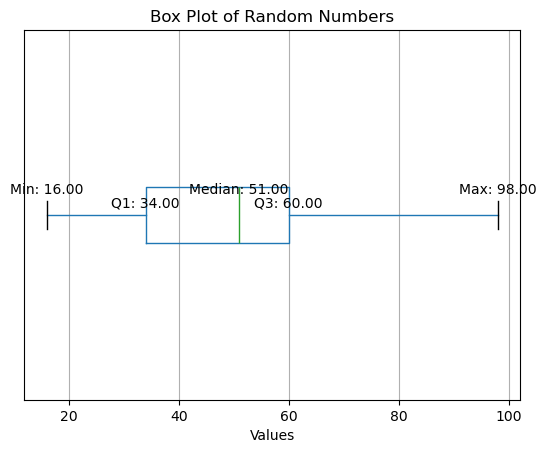

In [4]:
# Lets create a box plot for 5 Number summary in Data Minning Using Matplotlib , Pandas & Numpy for odd numbers.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to generate random numbers based on user input
def generate_random_numbers():
    while True:
        user_input = input("Enter 'odd' for odd numbers or 'even' for even numbers: ")
        if user_input.lower() == 'odd':
            data = np.random.randint(0, 100, 13)
            while len(data) % 2 == 0:
                data = np.random.randint(0, 100, 13)
            return data
        elif user_input.lower() == 'even':
            data = np.random.randint(0, 100, 14)
            while len(data) % 2 != 0:
                data = np.random.randint(0, 100, 14)
            return data
        else:
            print("Invalid input. Please try again.")

# Generate random numbers based on user choice
data = generate_random_numbers()

# Print the generated random numbers
print("Generated Random Numbers:")
print(data)

# Create a Pandas DataFrame
df = pd.DataFrame(data, columns=['Values'])

# Calculate the 5-number summary
summary = df['Values'].describe(percentiles=[0.25, 0.5, 0.75])
print("5-Number Summary:", summary)
# Create the box plot
fig, ax = plt.subplots()
bp = df.boxplot(column='Values', vert=False, return_type='dict', ax=ax)

# Add labels and title
ax.set_yticks([])
ax.set_xlabel('Values')
ax.set_title('Box Plot of Random Numbers')

# Display the 5-number summary
ax.text(summary['min'], 1.05, f'Min: {summary["min"]:.2f}', ha='center', va='bottom', fontsize=10)
ax.text(summary['25%'], 1.05, f'Q1: {summary["25%"]:.2f}', ha='center', va='top', fontsize=10)
ax.text(summary['50%'], 1.05, f'Median: {summary["50%"]:.2f}', ha='center', va='bottom', fontsize=10)
ax.text(summary['75%'], 1.05, f'Q3: {summary["75%"]:.2f}', ha='center', va='top', fontsize=10)
ax.text(summary['max'], 1.05, f'Max: {summary["max"]:.2f}', ha='center', va='bottom', fontsize=10)

plt.show()

In [5]:
# Step 1: Import the required libraries
import pandas as pd
import numpy as np

# Step 2: Create the data
data = pd.DataFrame({'Age': [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 50]})

# Step 3: Calculate the first and third quartile
Q1 = np.percentile(data['Age'], 25, interpolation = 'midpoint')
Q3 = np.percentile(data['Age'], 75, interpolation = 'midpoint')

# Step 4: Calculate the IQR
IQR = Q3 - Q1

# Step 5: Calculate the lower and upper bound
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Step 6: Print the data
print("----------------------------------------")
print(f"Here is the data with outliers:\n {data}")
print("----------------------------------------")
# Step 7: Print the outliers
print(f"Here are the outliers based on the IQR threshold:\n {data[(data['Age'] < lower_bound) | (data['Age'] > upper_bound)]}")
print("----------------------------------------")
# Step 8: Remove the outliers
data = data[(data['Age'] >= lower_bound) & (data['Age'] <= upper_bound)]

# Step 9: Print the data without outliers
print(f"Here is the data without outliers:\n {data}")

----------------------------------------
Here is the data with outliers:
     Age
0    20
1    21
2    22
3    23
4    24
5    25
6    26
7    27
8    28
9    29
10   30
11   50
----------------------------------------
Here are the outliers based on the IQR threshold:
     Age
11   50
----------------------------------------
Here is the data without outliers:
     Age
0    20
1    21
2    22
3    23
4    24
5    25
6    26
7    27
8    28
9    29
10   30


# Through Kmean clustering

In [6]:
# Import library
from sklearn.cluster import KMeans

# Sample data
data = [[2, 2], [3, 3], [3, 4], [30, 30], [31, 31], [32, 32]]

# Create a K-means model with two clusters (normal and outlier)
kmeans = KMeans(n_clusters=2, n_init=10)
kmeans.fit(data)



c:\Users\ahcom\miniconda3\envs\ml\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\ahcom\miniconda3\envs\ml\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\ahcom\miniconda3\envs\ml\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ahcom\miniconda3\envs\ml\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\ahcom\miniconda3\envs\ml\Lib\subprocess.py", line 1538, in _execute_c

KMeans(n_clusters=2, n_init=10)

In [ ]:
conda install scikit-learn

In [7]:
# Predict cluster labels
labels = kmeans.predict(data)

# Identify outliers based on cluster labels
outliers = [data[i] for i, label in enumerate(labels) if label == 1]

# print data
print("Data:", data)
print("Outliers:", outliers)
# Remove outliers
data = [data[i] for i, label in enumerate(labels) if label == 0]
print("Data without outliers:", data)

Data: [[2, 2], [3, 3], [3, 4], [30, 30], [31, 31], [32, 32]]
Outliers: [[30, 30], [31, 31], [32, 32]]
Data without outliers: [[2, 2], [3, 3], [3, 4]]
